# Family Physician Service Type Utilisation 

## Clean

In [14]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(forcats)
library(scales)

In [15]:
d = read.csv('Family Physician Service Type Utilisation by Patient Age Bands & Gender for Fiscal Years 2010-11 to 2014-15 (Data).csv', as.is=TRUE)

In [16]:
HealthZoneLabels =  c(
    'Moncton',
    'Saint John',
    'Fredericton',
    'Edmunston',
    'Campbellton',
    'Bathurst',
    'Miramichi')

AgeGroupLabels = c(
    '00 - 04 Years',
    '05 - 09 Years',
    '10 - 14 Years',
    '15 - 19 Years',
    '20 - 24 Years',
    '25 - 29 Years',
    '30 - 34 Years',
    '35 - 39 Years',
    '40 - 44 Years',
    '45 - 49 Years',
    '50 - 54 Years',
    '55 - 59 Years',
    '60 - 64 Years',
    '65 - 69 Years',
    '70 - 74 Years',
    '75 - 79 Years',
    '80 - 84 Years',
    '85 - 89 Years',
    '90+ Years')

In [17]:
c = d %>% 

    # Less than 10 patients in group
    dplyr::filter(Unique.Patients.Seen != '-') %>%

    transmute(Date = as.Date(sprintf('%s/%s/1', gsub('^(2...)/.*$', '\\1', Fiscal.Year), Fiscal.Quarter*3)),
              ServiceType = as.factor(Service.Type..Major..Group.Description),
              ServiceTypeGroup = as.factor(Service.Type.Group.Description),
              HealthZone = factor(Health.Zone, levels=1:7, labels=HealthZoneLabels),
              Gender = factor(Gender.Description),
              AgeGroup = factor(Age.Group.Description, labels=AgeGroupLabels),
              UniquePatientsSeen = as.numeric(Unique.Patients.Seen),
              PatientVisits = as.numeric(Patient.Visits),
              ServicesDelivered = as.numeric(Services.Delivered)) 

str(c)

'data.frame':	38421 obs. of  9 variables:
 $ Date              : Date, format: "2010-03-01" "2010-03-01" ...
 $ ServiceType       : Factor w/ 3 levels "Other Services",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ ServiceTypeGroup  : Factor w/ 16 levels "Anaesthesia Services",..: 8 8 8 8 8 8 8 8 8 8 ...
 $ HealthZone        : Factor w/ 7 levels "Moncton","Saint John",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Gender            : Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ AgeGroup          : Factor w/ 19 levels "00 - 04 Years",..: 1 2 5 6 7 8 9 10 11 12 ...
 $ UniquePatientsSeen: num  204 12 12 15 15 25 28 53 44 55 ...
 $ PatientVisits     : num  330 27 21 33 42 46 71 203 107 181 ...
 $ ServicesDelivered : num  374 34 26 42 97 75 148 476 280 666 ...


## Notes

* __Unique Patients Seen__ totals seen to be consistently over reported in the third quarter and under reported in the second. Subsequent time series plots use smoothing to normalize differences.

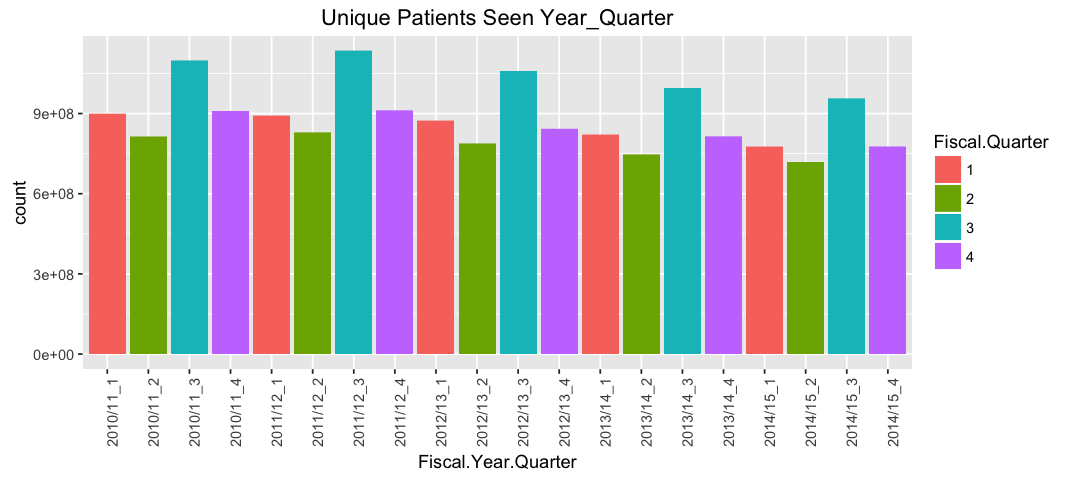

In [61]:
d %>% dplyr::filter(Unique.Patients.Seen != '-') %>%
    mutate(Fiscal.Year.Quarter = paste0(Fiscal.Year, '_', Fiscal.Quarter)) %>%
    mutate(Fiscal.Year.Quarter = as.factor(Fiscal.Year.Quarter), Fiscal.Quarter = as.factor(Fiscal.Quarter)) %>%
    group_by(Fiscal.Year.Quarter) %>% mutate(count=sum(as.numeric(Unique.Patients.Seen))) %>%
    ggplot(aes(x=Fiscal.Year.Quarter, y=count, fill=Fiscal.Quarter)) + 
        geom_bar(stat='identity') + 
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        ggtitle('Unique Patients Seen Year_Quarter')


## Summaries

### Health zone over time

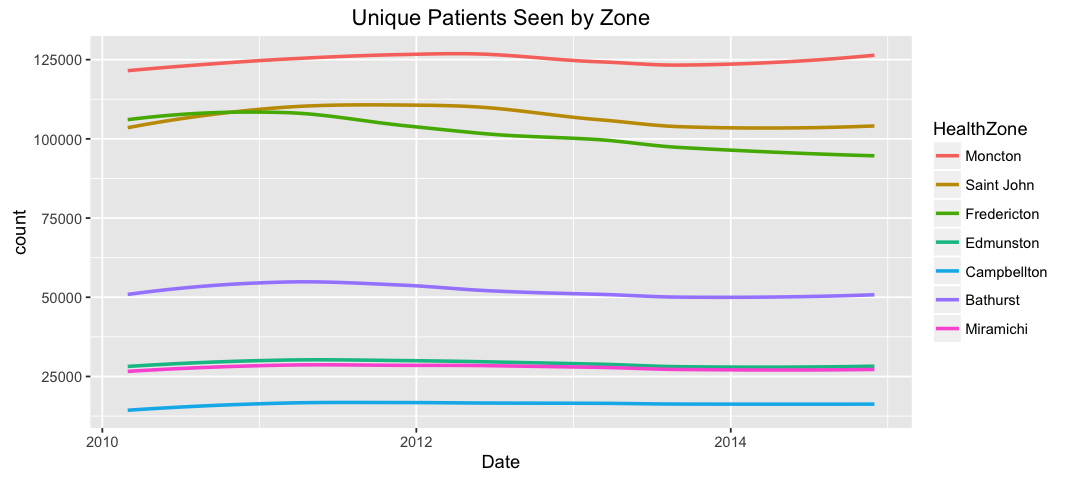

In [35]:
options(repr.plot.width=9, repr.plot.height=4)
c %>% group_by(Date, HealthZone) %>% summarize(count = sum(UniquePatientsSeen)) %>%
    ggplot(aes(x=Date, y=count, col=HealthZone)) + 
        stat_smooth(se=FALSE) + 
        ggtitle('Unique Patients Seen by Zone')

### Gender over time

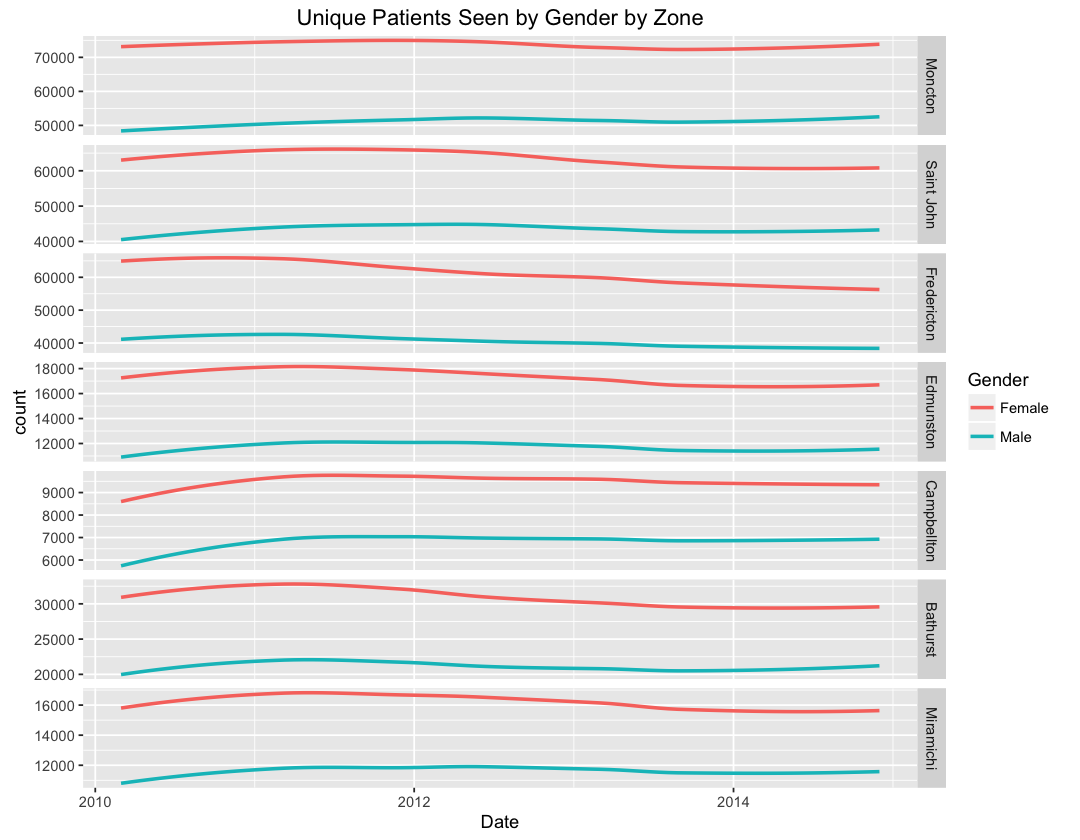

In [36]:
options(repr.plot.width=9, repr.plot.height=7)
c %>% group_by(Date, Gender, HealthZone) %>% summarize(count = sum(UniquePatientsSeen)) %>%
    ggplot(aes(x=Date, y=count, col=Gender)) + 
        stat_smooth(se=FALSE) + 
        facet_grid(HealthZone ~ ., scales = 'free_y') +
        ggtitle('Unique Patients Seen by Gender by Zone')

### Age group over time

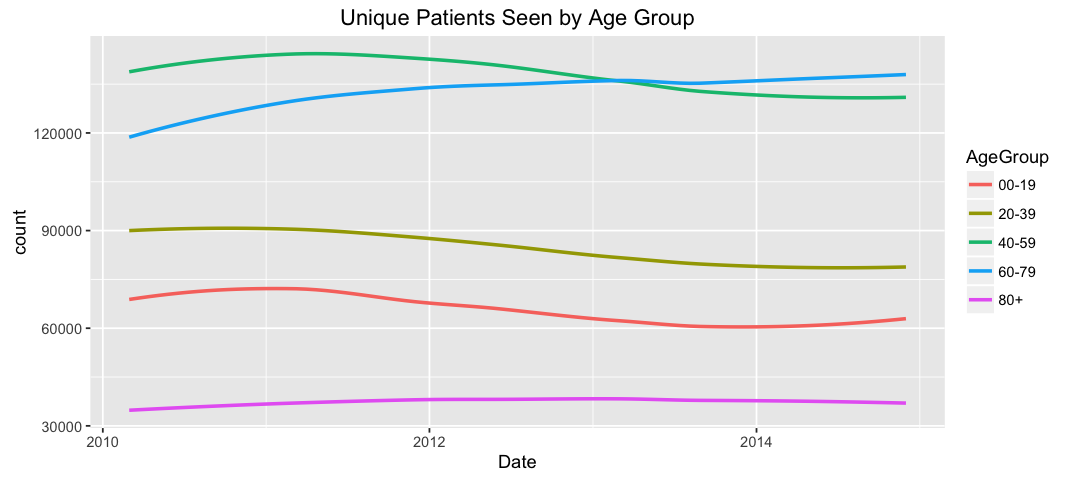

In [37]:
options(repr.plot.width=9, repr.plot.height=4)
c %>% mutate(AgeGroup = fct_collapse(AgeGroup, '00-19' = c('00 - 04 Years', '05 - 09 Years', '10 - 14 Years', '15 - 19 Years'),
                                    '20-39' = c('20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years'),
                                    '40-59' = c('40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years'),
                                    '60-79' = c('60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years'),
                                    '80+' = c('80 - 84 Years', '85 - 89 Years', '90+ Years'))) %>%
    group_by(Date, AgeGroup) %>% summarize(count = sum(UniquePatientsSeen)) %>%
    ggplot(aes(x=Date, y=count, col=AgeGroup)) + 
        stat_smooth(se=FALSE) + 
        ggtitle('Unique Patients Seen by Age Group')


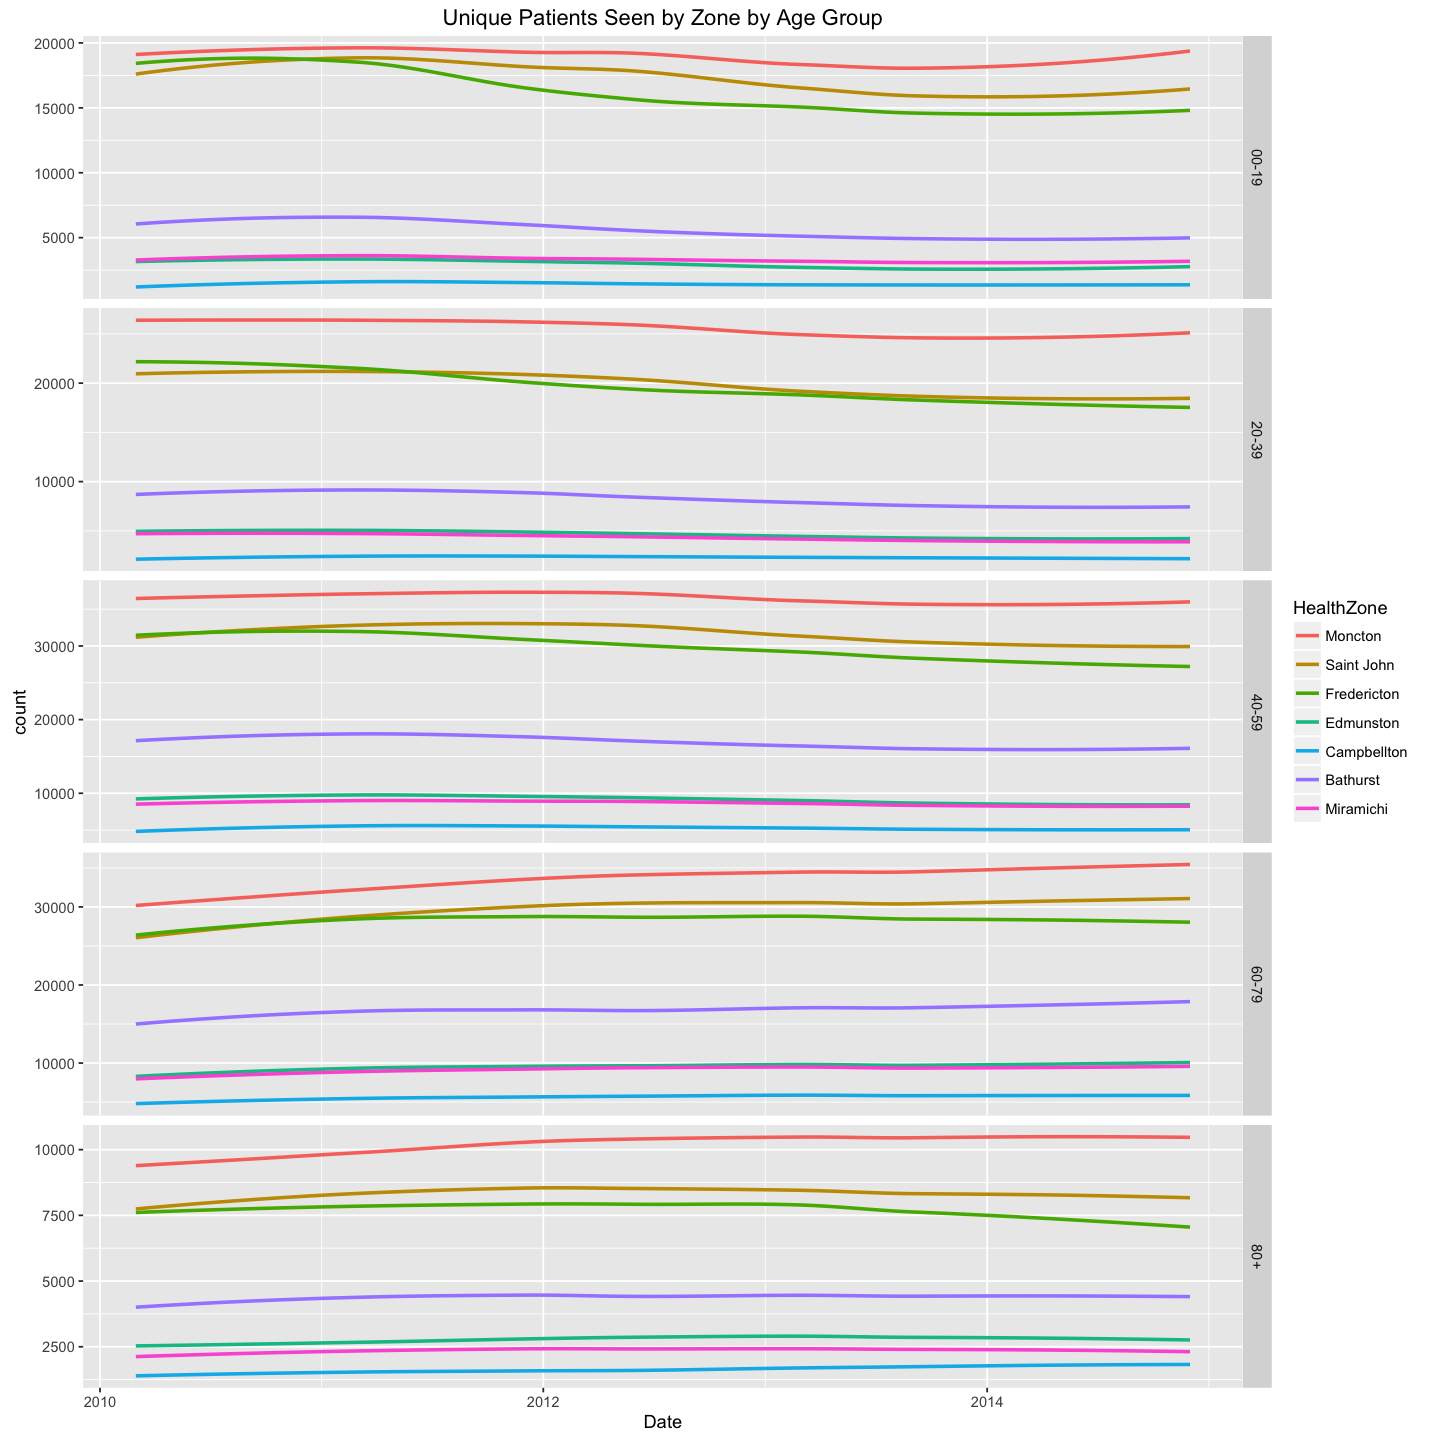

In [38]:
options(repr.plot.width=12, repr.plot.height=12)
c %>% mutate(AgeGroup = fct_collapse(AgeGroup, '00-19' = c('00 - 04 Years', '05 - 09 Years', '10 - 14 Years', '15 - 19 Years'),
                                    '20-39' = c('20 - 24 Years', '25 - 29 Years', '30 - 34 Years', '35 - 39 Years'),
                                    '40-59' = c('40 - 44 Years', '45 - 49 Years', '50 - 54 Years', '55 - 59 Years'),
                                    '60-79' = c('60 - 64 Years', '65 - 69 Years', '70 - 74 Years', '75 - 79 Years'),
                                    '80+' = c('80 - 84 Years', '85 - 89 Years', '90+ Years'))) %>%
    group_by(Date, HealthZone, AgeGroup) %>% summarize(count = sum(UniquePatientsSeen)) %>%
    ggplot(aes(x=Date, y=count, col=HealthZone)) + 
        stat_smooth(se=FALSE) + 
        facet_grid(AgeGroup ~ ., scales = 'free_y') +
        ggtitle('Unique Patients Seen by Zone by Age Group')

## Service Type over time

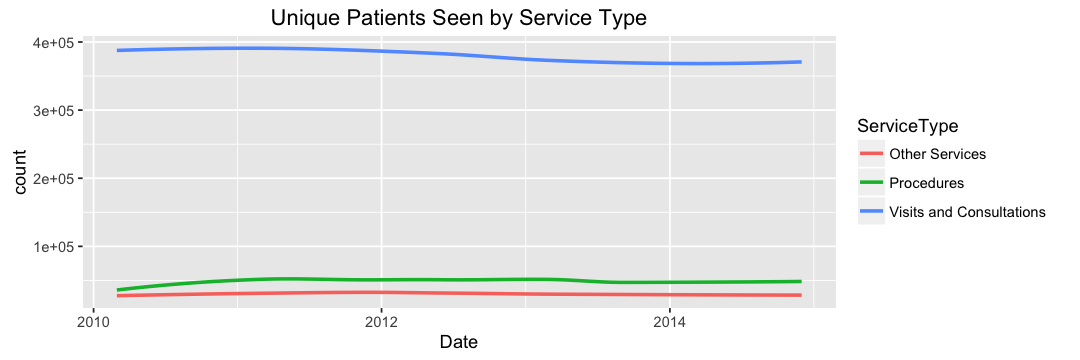

In [63]:
options(repr.plot.width=9, repr.plot.height=3)
c %>% group_by(Date, ServiceType) %>% summarize(count = sum(UniquePatientsSeen)) %>%
    ggplot(aes(x=Date, y=count, col=ServiceType)) + 
        stat_smooth(se=FALSE) + 
        ggtitle('Unique Patients Seen by Service Type')


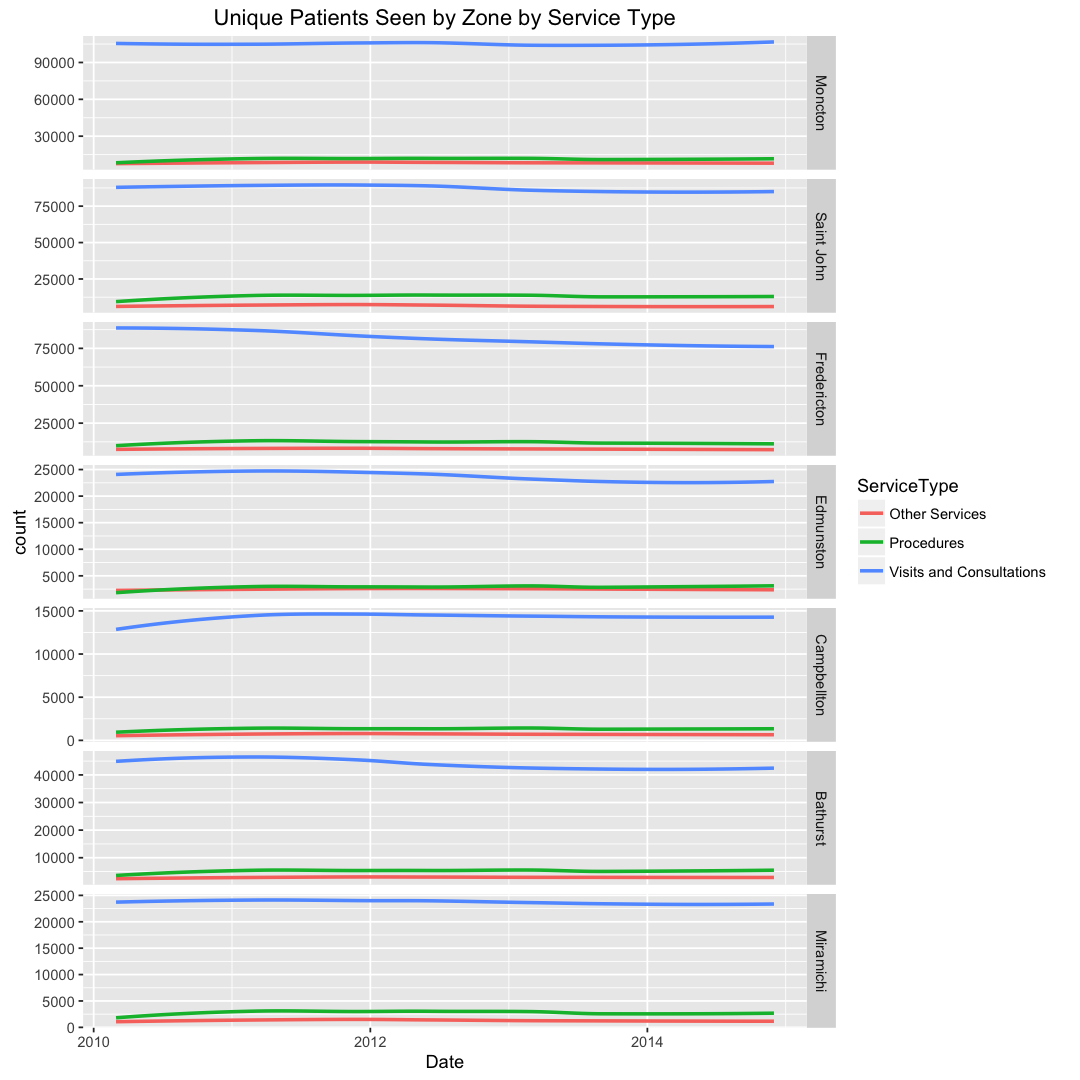

In [71]:
options(repr.plot.width=9, repr.plot.height=9)
c %>% group_by(Date, HealthZone, ServiceType) %>% summarize(count = sum(UniquePatientsSeen)) %>%
    ggplot(aes(x=Date, y=count, col=ServiceType)) + 
        stat_smooth(se=FALSE) + 
        facet_grid(HealthZone ~ ., scales = 'free_y') +
        ggtitle('Unique Patients Seen by Zone by Service Type')


## Service Type Group over time


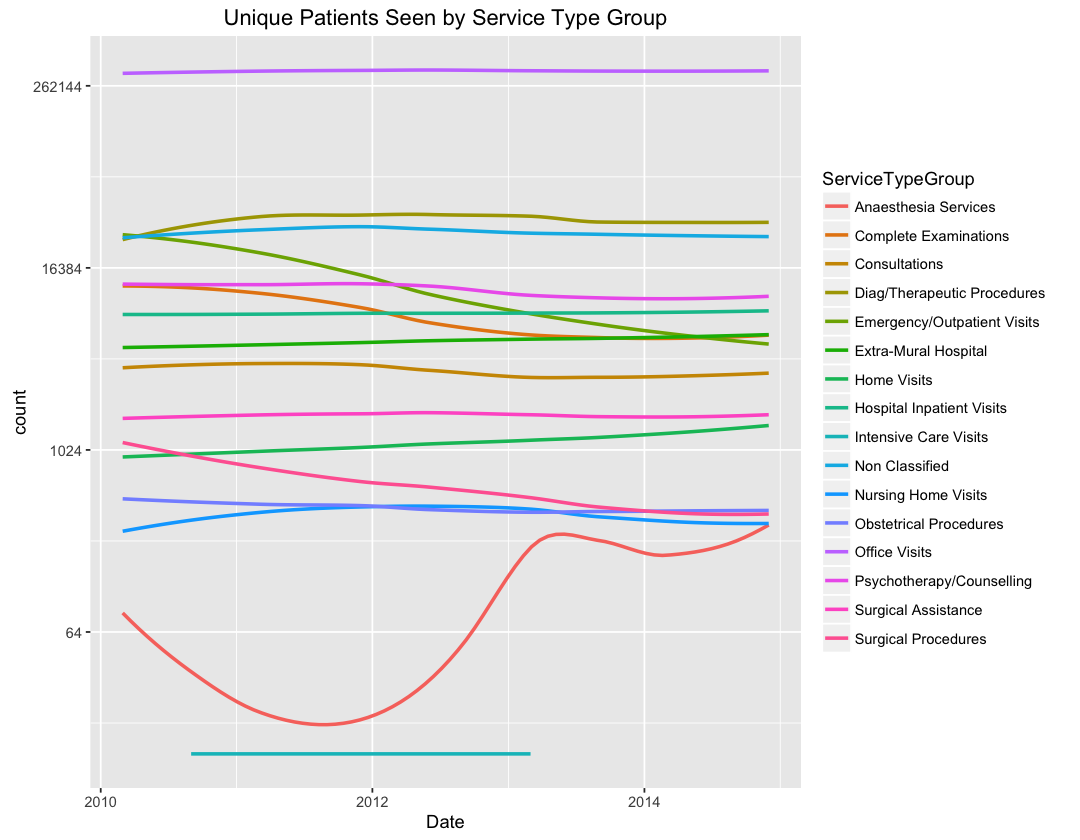

In [105]:
options(repr.plot.width=9, repr.plot.height=7)
c %>% group_by(Date, ServiceTypeGroup) %>% summarize(count = sum(UniquePatientsSeen)) %>%
    ggplot(aes(x=Date, y=count, col=ServiceTypeGroup)) + scale_y_continuous(trans=log2_trans()) +
        stat_smooth(se=FALSE) + 
        ggtitle('Unique Patients Seen by Service Type Group')


Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at 15120”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 737.4”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  0”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 4.1783e+05”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“span too small.   fewer data values than degrees of freedom.”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“at  15583”Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“

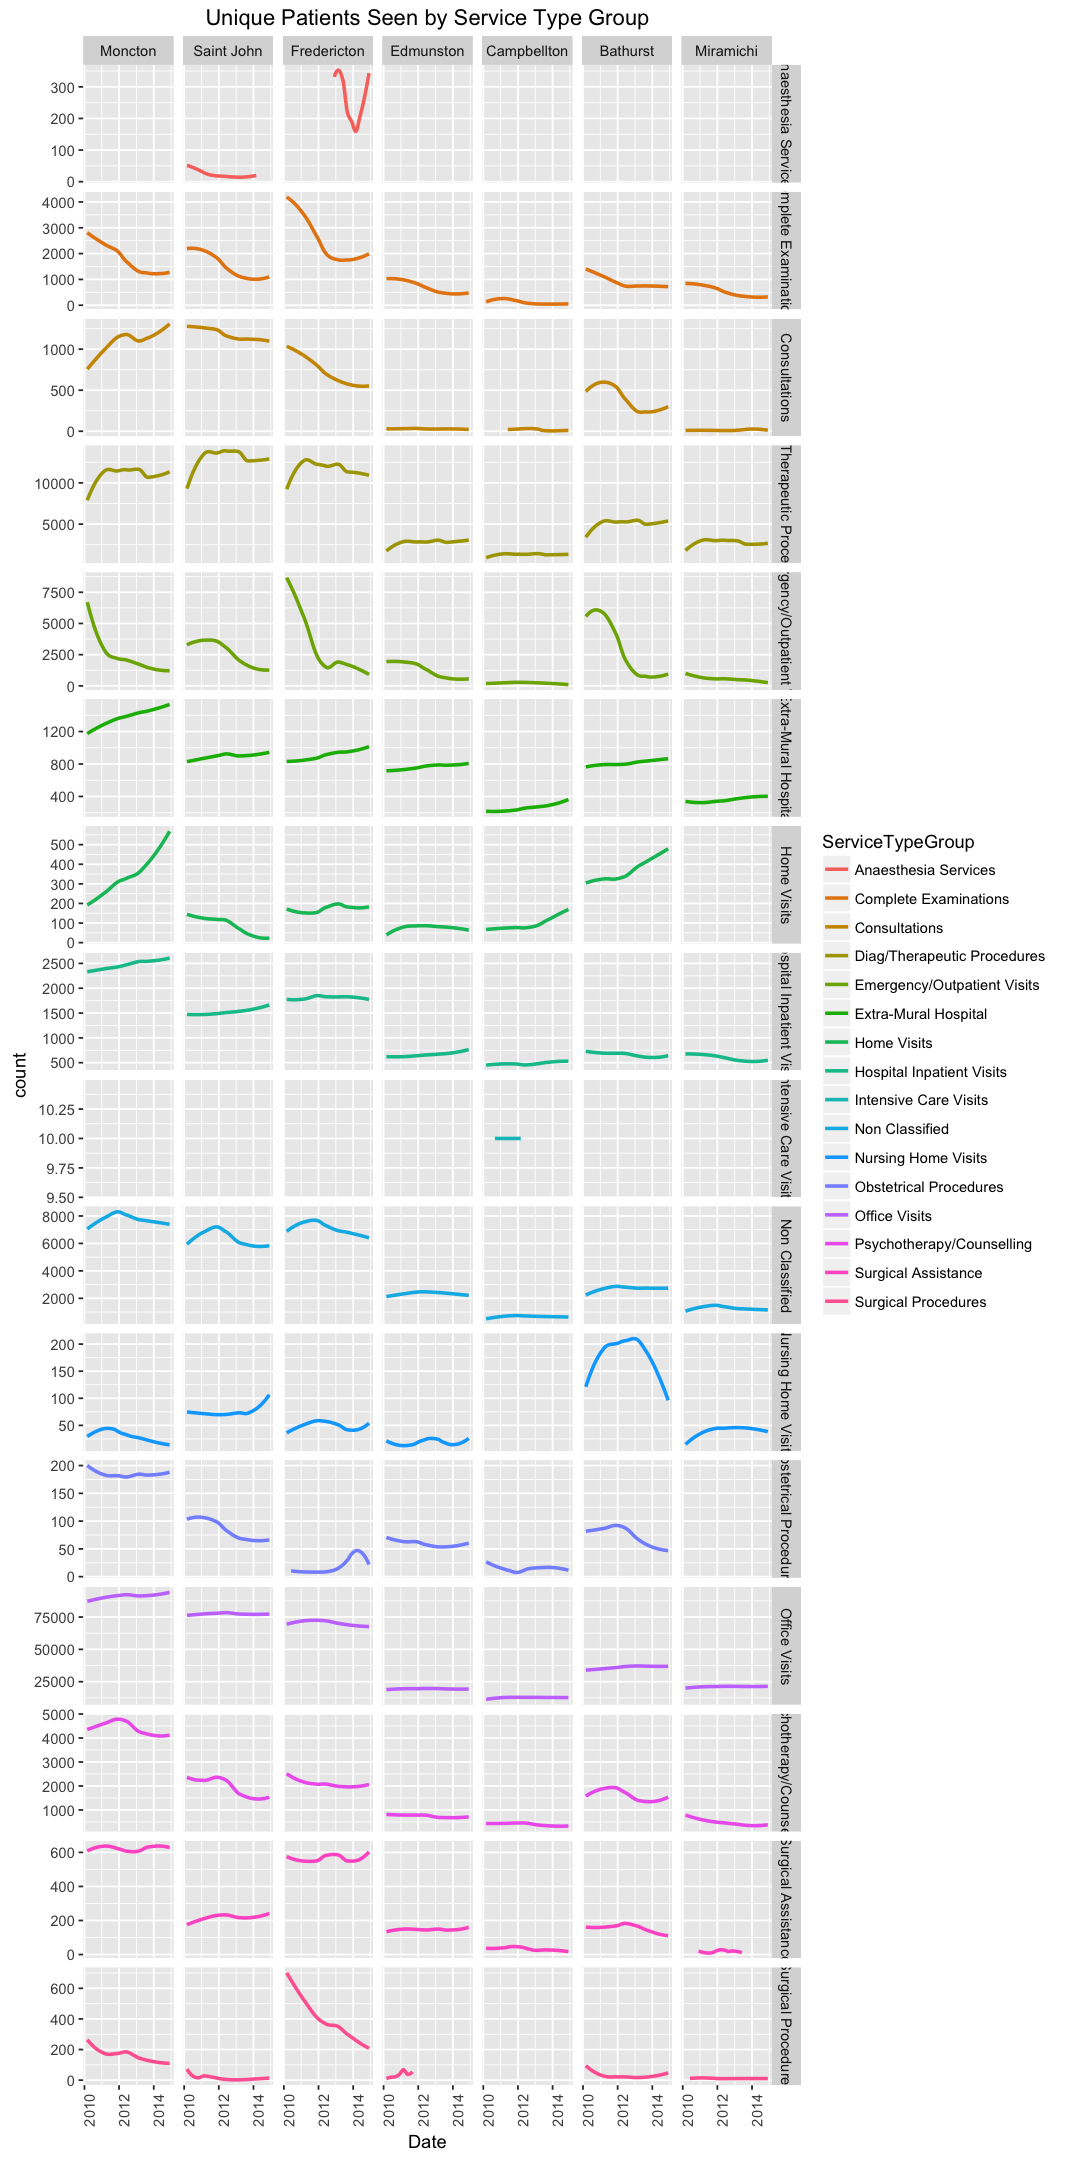

In [133]:
options(repr.plot.width=9, repr.plot.height=18)
c %>% group_by(Date, HealthZone, ServiceTypeGroup) %>% summarize(count = sum(UniquePatientsSeen)) %>% 
    ggplot(aes(x=Date, y=count, col=ServiceTypeGroup)) +
        stat_smooth(method = "loess", se=FALSE) +
        facet_grid(ServiceTypeGroup ~ HealthZone, scales = 'free') +
        theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
        ggtitle('Unique Patients Seen by Service Type Group')